In [8]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
from env_helpers import make_env
from visualization import states_to_imgs
# Add the parent directory to path
sys.path.insert(1, os.path.join(sys.path[0], '..'))

env = make_env('MiniGrid-Empty-6x6-v0')

# Get initial observation
obs = env.reset()




Raw observation type: <class 'numpy.ndarray'>
Raw observation shape: (3, 56, 56)
Raw observation dtype: float64
Raw observation range: [0.298, 1.000]
Channels: 3, Height: 56, Width: 56
Channel 0 unique values: [0.29803922 0.38823529 0.44705882 0.45098039 0.57254902 0.60784314
 0.68627451 0.92156863 1.        ]
Channel 1 unique values: [0.29803922 0.38823529 0.44705882 0.57254902 1.        ]
Channel 2 unique values: [0.29803922 0.38823529 0.44705882 0.57254902]


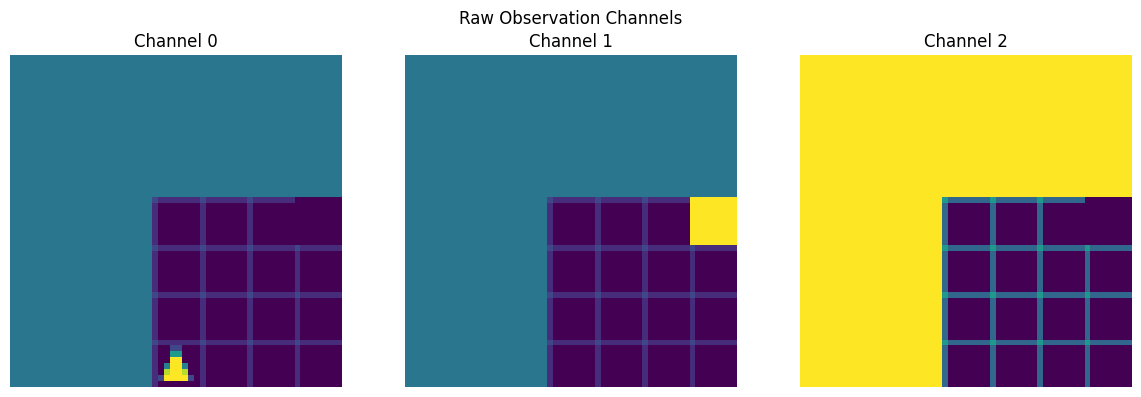

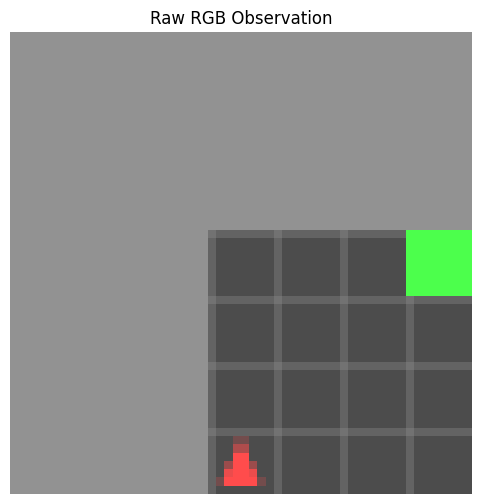

In [28]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt

# Add the parent directory to path
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from env_helpers import make_env
from visualization import states_to_imgs





env = make_env('MiniGrid-Empty-6x6-v0')

# Get initial observation
obs = env.reset()



obs = obs[0]

print(f"Raw observation type: {type(obs)}")
print(f"Raw observation shape: {obs.shape}")
print(f"Raw observation dtype: {obs.dtype}")
print(f"Raw observation range: [{obs.min():.3f}, {obs.max():.3f}]")

# Check if observation has proper spatial dimensions
if len(obs.shape) == 3:
    print(f"Channels: {obs.shape[0]}, Height: {obs.shape[1]}, Width: {obs.shape[2]}")

# Visualize each channel
fig, axes = plt.subplots(1, obs.shape[0], figsize=(12, 4))
if obs.shape[0] == 1:
    axes = [axes]

for i in range(obs.shape[0]):
    channel = obs[i]
    axes[i].imshow(channel, cmap='viridis')
    axes[i].set_title(f'Channel {i}')
    axes[i].axis('off')
    print(f"Channel {i} unique values: {np.unique(channel)}")

plt.suptitle('Raw Observation Channels')
plt.tight_layout()
plt.savefig('debug_raw_channels.png', dpi=150, bbox_inches='tight')
plt.show()


# Visualize full RGB if 3 channels
if obs.shape[0] == 3:
    rgb_img = obs.transpose(1, 2, 0)
    plt.figure(figsize=(6, 6))
    plt.imshow(rgb_img.clip(0, 1))
    plt.title('Raw RGB Observation')
    plt.axis('off')
    plt.savefig('debug_raw_rgb.png', dpi=150, bbox_inches='tight')
    plt.show()


In [10]:
obs

(array([[[0.57254902, 0.57254902, 0.57254902, ..., 0.57254902,
          0.57254902, 0.57254902],
         [0.57254902, 0.57254902, 0.57254902, ..., 0.57254902,
          0.57254902, 0.57254902],
         [0.57254902, 0.57254902, 0.57254902, ..., 0.57254902,
          0.57254902, 0.57254902],
         ...,
         [0.57254902, 0.57254902, 0.57254902, ..., 0.29803922,
          0.29803922, 0.29803922],
         [0.57254902, 0.57254902, 0.57254902, ..., 0.29803922,
          0.29803922, 0.29803922],
         [0.57254902, 0.57254902, 0.57254902, ..., 0.29803922,
          0.29803922, 0.29803922]],
 
        [[0.57254902, 0.57254902, 0.57254902, ..., 0.57254902,
          0.57254902, 0.57254902],
         [0.57254902, 0.57254902, 0.57254902, ..., 0.57254902,
          0.57254902, 0.57254902],
         [0.57254902, 0.57254902, 0.57254902, ..., 0.57254902,
          0.57254902, 0.57254902],
         ...,
         [0.57254902, 0.57254902, 0.57254902, ..., 0.29803922,
          0.29803922, 0.